# [Titanic Dataset]('https://www.kaggle.com/competitions/titanic/overview')

### `File Descriptions:`

### **Goal**

* It is your job to predict if a passenger survived the sinking of the Titanic or not.
For each in the test set, you must predict a 0 or 1 value for the variable.

### **Metrics**

* Your score is the percentage of passengers you correctly predict. This is known as accuracy.

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
plt.style.use('seaborn-whitegrid') # Plot style
plt.rcParams['figure.figsize'] = (10.0, 8.0)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz


%matplotlib inline
%load_ext autoreload
%autoreload 2

/var/folders/9b/k35zb79j27vcvxd_45b3jpd80000gn/T/ipykernel_4458/2229893287.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid') # Plot style


## `1. Exploratory Data Analysis`

### `Loading Data`

In [2]:
df_train = pd.read_csv('titanic_data/train.csv')
df_test = pd.read_csv('titanic_data/test.csv')

In [3]:
display(df_train.head(), df_test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df_train.shape, df_test.shape

((891, 12), (418, 11))

In [5]:
df_all = pd.concat([df_train, df_test]).reset_index(drop=True)
df_y = df_train[['Survived']]
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [7]:
df_all.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


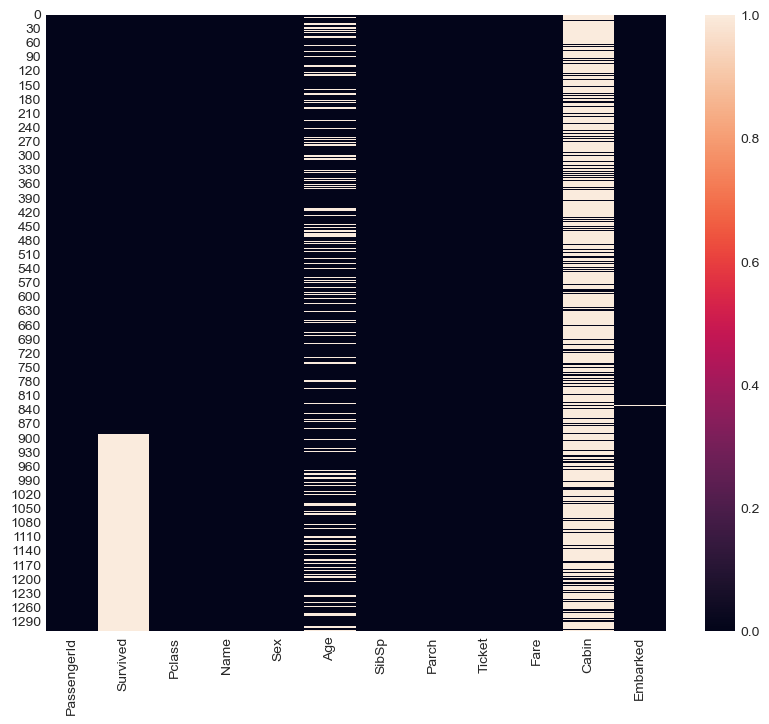

In [8]:
sns.heatmap(df_all.isnull());

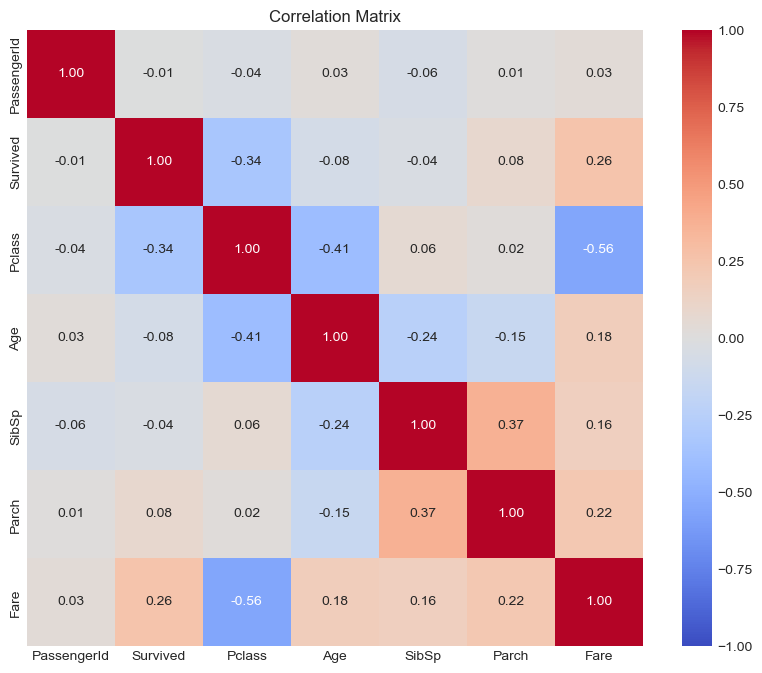

In [9]:
sns.heatmap(data = df_all.corr(numeric_only = True), vmin = -1, vmax = 1, cmap = 'coolwarm', annot = True, fmt = '.2f', square = True);
plt.title('Correlation Matrix');

### `Categorical Columns`

In [10]:
cateogrical_columns = df_all.select_dtypes(exclude=[np.number])
categorical_names = cateogrical_columns.columns.tolist()
print("The number of categorical feature is ", cateogrical_columns.shape[1])
print(categorical_names)

The number of categorical feature is  5
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


### `Numerical Columns`

In [11]:
numerical_columns = df_all.select_dtypes(include=[np.number])
numerical_columns.drop(['PassengerId','Survived'], axis = 1, inplace=True)
numerical_names = numerical_columns.columns.tolist()
print("The number of numeric feature is ", numerical_columns.shape[1])
print(numerical_names)

The number of numeric feature is  5
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


  variable  value
0   Pclass    3.0
1   Pclass    1.0
2   Pclass    3.0
3   Pclass    1.0
4   Pclass    3.0


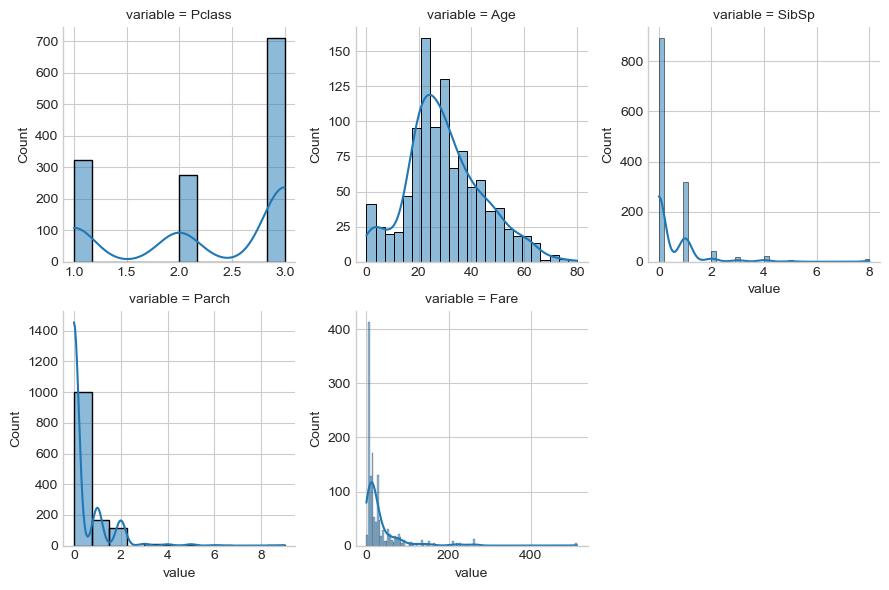

In [12]:
f = pd.melt(df_all, value_vars = numerical_names)
print(f.head())
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.histplot, "value", kde=True )

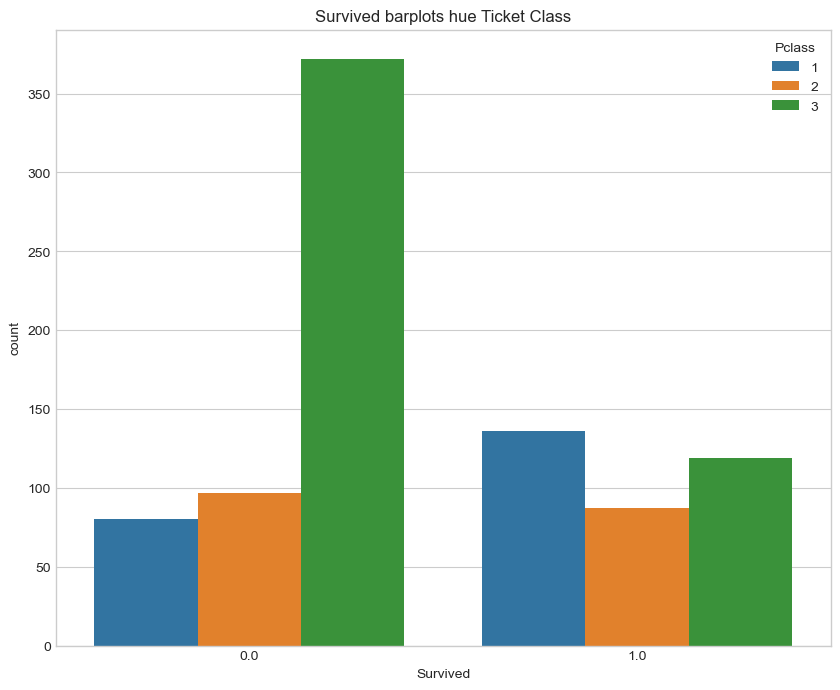

In [13]:
sns.countplot(data = df_all, x = 'Survived', hue = 'Pclass');
plt.title('Survived barplots hue Ticket Class');

### `Fill Missing Values`

In [14]:
df_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# Drop Target Column
df_all.drop('Survived', axis = 1, inplace=True)
# Drop Name Column
df_all.drop('Name', axis = 1, inplace=True)
# Drop Ticket Column
df_all.drop('Ticket', axis = 1, inplace=True)


In [16]:
missing_cols = [(features, df_all[features].isnull().sum(), df_all[features].dtype) 
                  for features in df_all.columns if df_all[features].isnull().sum() > 0]


sorted_missing_cols = sorted(missing_cols, key=lambda x: -x[1])
sorted_missing_cols

[('Cabin', 1014, dtype('O')),
 ('Age', 263, dtype('float64')),
 ('Embarked', 2, dtype('O')),
 ('Fare', 1, dtype('float64'))]

#### `'Cabin' Column`

In [17]:
# Many missing values
df_all.drop(['Cabin'], axis=1, inplace=True)


#### `'Age' Column`

* filling values with median of each 'Pclass'

In [18]:
age_med = dict(df_all.Age.groupby(by = df_all['Pclass']).aggregate(np.median))
print(age_med) 

{1: 39.0, 2: 29.0, 3: 24.0}


In [19]:
df_all.loc[df_all.Pclass == 1, 'Age'] = df_all.loc[df_all.Pclass == 1, 'Age'].fillna(39.0)
df_all.loc[df_all.Pclass == 2, 'Age'] = df_all.loc[df_all.Pclass == 2, 'Age'].fillna(29.0)
df_all.loc[df_all.Pclass == 3, 'Age'] = df_all.loc[df_all.Pclass == 3, 'Age'].fillna(24.0)

#### `'Fare' Column`

In [20]:
df_all['Fare'] = df_all['Fare'].fillna(df_all['Fare'].median())

#### `'Embarked' Column`

In [21]:
df_all['Embarked'] = df_all['Embarked'].fillna(df_all['Embarked'].mode()[0])

In [22]:
print('Missing Values: ' , df_all.isna().sum().sum())
print('Shape :' , df_all.shape)

Missing Values:  0
Shape : (1309, 8)


### `Categorical Columns One-Hot Encoding`

In [23]:
df_all

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1304,1305,3,male,24.0,0,0,8.0500,S
1305,1306,1,female,39.0,0,0,108.9000,C
1306,1307,3,male,38.5,0,0,7.2500,S
1307,1308,3,male,24.0,0,0,8.0500,S


In [24]:
df_all = pd.get_dummies(df_all)
display(df_all.shape, df_all.head(5))


(1309, 11)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,1


## `2. Training`

In [25]:
data_train = df_all.iloc[:df_train.shape[0]]
data_train['Survived'] = df_y['Survived']
data_test = df_all.iloc[df_train.shape[0]:]
display(data_train, data_test)

/var/folders/9b/k35zb79j27vcvxd_45b3jpd80000gn/T/ipykernel_4458/4125462323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['Survived'] = df_y['Survived']


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,1,3,22.0,1,0,7.2500,0,1,0,0,1,0
1,2,1,38.0,1,0,71.2833,1,0,1,0,0,1
2,3,3,26.0,0,0,7.9250,1,0,0,0,1,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,0,1,0,0,1,0
887,888,1,19.0,0,0,30.0000,1,0,0,0,1,1
888,889,3,24.0,1,2,23.4500,1,0,0,0,1,0
889,890,1,26.0,0,0,30.0000,0,1,1,0,0,1


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
891,892,3,34.5,0,0,7.8292,0,1,0,1,0
892,893,3,47.0,1,0,7.0000,1,0,0,0,1
893,894,2,62.0,0,0,9.6875,0,1,0,1,0
894,895,3,27.0,0,0,8.6625,0,1,0,0,1
895,896,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,24.0,0,0,8.0500,0,1,0,0,1
1305,1306,1,39.0,0,0,108.9000,1,0,1,0,0
1306,1307,3,38.5,0,0,7.2500,0,1,0,0,1
1307,1308,3,24.0,0,0,8.0500,0,1,0,0,1


In [26]:
X, y = data_train.iloc[:, :-1] , data_train.iloc[:, -1]
display(X, y)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,0,1,0,0,1
887,888,1,19.0,0,0,30.0000,1,0,0,0,1
888,889,3,24.0,1,2,23.4500,1,0,0,0,1
889,890,1,26.0,0,0,30.0000,0,1,1,0,0


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

#### `Without Tuning`

In [28]:
start = time.perf_counter()
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(X_train, y_train)
print(f'Time taken: {time.perf_counter()-start} sec')
print('Train accuracy: ', accuracy_score(model.predict(X_train), y_train))
print('Test accuracy: ', accuracy_score(model.predict(X_val), y_val))

Time taken: 0.00467525000567548 sec
Train accuracy:  0.8342696629213483
Test accuracy:  0.7988826815642458


#### `With Tuning`

In [29]:
%%time
tree_params = {"max_depth": range(2, 6)}
best_tree = GridSearchCV(
      model, tree_params, cv = 5
)

best_tree.fit(X_train, y_train)

CPU times: user 38.7 ms, sys: 1.44 ms, total: 40.2 ms
Wall time: 39.3 ms


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'max_depth': range(2, 6)})

In [30]:
print("Best params:", best_tree.best_params_)
print("Best cross validaton score", best_tree.best_score_)

Best params: {'max_depth': 3}
Best cross validaton score 0.8159854230276766


In [35]:
tuned_tree = DecisionTreeClassifier(criterion='gini' , max_depth=3)
tuned_tree.fit(X_train, y_train)
tuned_tree_predictions = tuned_tree.predict(X_val[X_train.columns])
accuracy_score(y_val, tuned_tree_predictions)

0.7988826815642458

### `For Test`

In [44]:
tuned_tree = DecisionTreeClassifier(criterion='gini' , max_depth=3)
tuned_tree.fit(X, y)
preds = tuned_tree.predict(data_test[X.columns])
preds

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [46]:
sample_submission_df = pd.read_csv('titanic_data/gender_submission.csv')
sample_submission_df['Survived'] = preds
sample_submission_df.to_csv('submission1.csv', index=False)
sample_submission_df


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
